In [1]:
import pandas as pd
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Acoustic_Extinguisher_Fire_Dataset.csv')
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['FUEL'] = encoder.fit_transform(df['FUEL'])
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [4]:
min(list(np.array(df['FREQUENCY']))),max(list(np.array(df['FREQUENCY'])))

(1, 75)

In [5]:
def min_max_features(df):
    cols = df.columns
    min_vals,max_vals=[],[]
    for i in range(len(cols)):
        min_vals.append(min(list(np.array(df[cols[i]]))))
        max_vals.append(max(list(np.array(df[cols[i]]))))
    return min_vals,max_vals
mini,maxi = min_max_features(df)
list(zip(mini,maxi))

[(1, 7), (0, 3), (10, 190), (72, 113), (0.0, 17.0), (1, 75), (0, 1)]

In [6]:
inputs = list(zip(mini,maxi))[:-1]
inputs

[(1, 7), (0, 3), (10, 190), (72, 113), (0.0, 17.0), (1, 75)]

In [7]:
input_list=[]
for i in inputs:
    input_list.append(list(i))
input_list

[[1, 7], [0, 3], [10, 190], [72, 113], [0.0, 17.0], [1, 75]]

In [8]:
# Feed forward
error = []
net = nl.net.newff(input_list,[6,1])

In [9]:
net.trainf = nl.train.train_rprop


In [10]:
X = np.array(df.iloc[:,:6])
Y = np.array(df.iloc[:,6:7])



In [11]:
error.append(net.train(X,Y,show=1,epochs=100))

Epoch: 1; Error: 8871.710256228283;
Epoch: 2; Error: 4296.085935788596;
Epoch: 3; Error: 4181.691287107829;
Epoch: 4; Error: 18301.641775313172;
Epoch: 5; Error: 3495.012822890302;
Epoch: 6; Error: 1994.6497840143766;
Epoch: 7; Error: 2078.9733215880315;
Epoch: 8; Error: 2179.4158747574493;
Epoch: 9; Error: 1717.899844836414;
Epoch: 10; Error: 1588.4605296403854;
Epoch: 11; Error: 1390.6027310788606;
Epoch: 12; Error: 1277.0439359978682;
Epoch: 13; Error: 1242.9271665794145;
Epoch: 14; Error: 1181.3481323234241;
Epoch: 15; Error: 1141.2846265664475;
Epoch: 16; Error: 1106.1745016690375;
Epoch: 17; Error: 1070.1750252627392;
Epoch: 18; Error: 1041.7627174920292;
Epoch: 19; Error: 1024.1601280142909;
Epoch: 20; Error: 1052.888621562404;
Epoch: 21; Error: 1015.1972080218891;
Epoch: 22; Error: 1027.0565995572256;
Epoch: 23; Error: 1011.7890575833858;
Epoch: 24; Error: 1010.2777600862876;
Epoch: 25; Error: 1006.7862985179881;
Epoch: 26; Error: 1004.1183971962942;
Epoch: 27; Error: 1001.2623

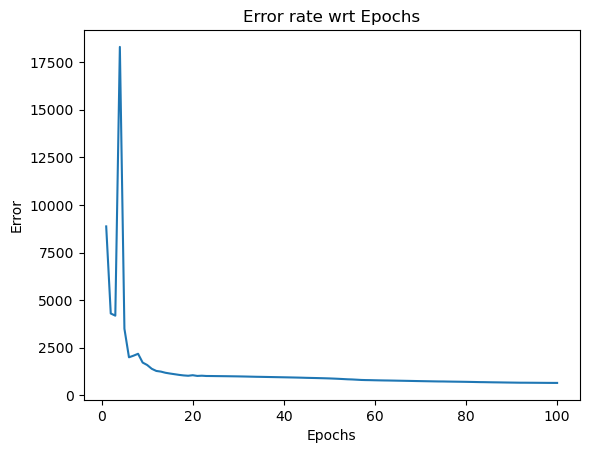

In [12]:
plt.plot(range(1,101),error[0])
plt.title('Error rate wrt Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [13]:
predicted_values = net.sim(X)     

In [14]:
predicted_class=predicted_values
predicted_class[predicted_values>0.5]=1
predicted_class[predicted_values<=0.5]=0

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y,predicted_class)
print(f'Accuracy : {accuracy*100:.2f} %' )

Accuracy : 89.87 %


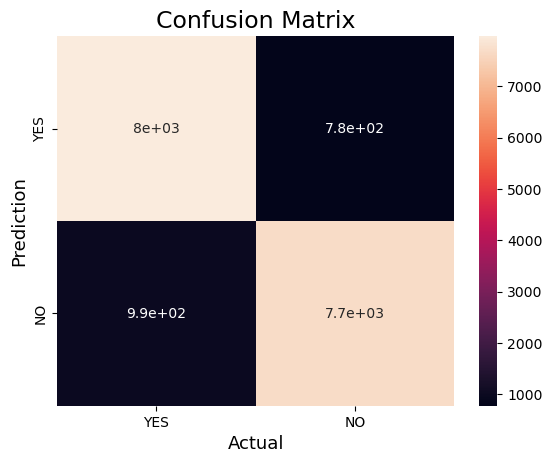

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,predicted_class)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()